# CESM Output

We'll be loading in data from the aquaplanet experiments to look at and understand CESM's output data better.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

We'll use xarray to open CESM's datasets. The data's location depends on what archiving method you used, but if you used
short term archiving, it should be in a format similar to what we have below.

In [2]:
data_control = xr.open_dataset("/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/cam5_new.cam.h0.0020-12.nc") #End of 20 year

#data_control is the experiment run with the control SST.

data_00 = xr.open_dataset("/data/keeling/a/pappup2/a/CESM/cam_00/CESM_output_data/atm/hist/cam_00.cam.h0.0020-12.nc") #End of 20 year

#data_00 is run with a perturbation of 2K at the equator

In [4]:
data_00

#Here's what CESM output datasets typically look like.

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, time: 1, lat: 96, lon: 144, slat: 95,
                    slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 0021-01-01 00:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/163)
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    hyai           (ilev) float64 ...
    hybi           (ilev) float64 ...
    P0             float64 ...
    date           (time) int32 ...
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 ...
    so4_a1_SRF     (time, lat, lon) float32 ...
    so4_a2_SRF     (time, lat, lon) float32 ...
    so4_a3_SRF     (time, lat, lon) float32 ...
    soa_a1_SRF     (time, lat, lon) float32 ...
    soa_a2_SRF     (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             cam_00
    title:            UNSET
    logname:          pappup2
    host:             keeling-j01
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /data/keeling/a/pappup2/a/CESM/CESM_input_data/atm/cam/...
    topography_file:  /data/keeling/a/pappup2/a/CESM/CESM_input_data/atm/cam/...

Plotting sea surface temperature (Noted as TS)

In [5]:
data_00.TS

<xarray.DataArray 'TS' (time: 1, lat: 96, lon: 144)>
array([[[273.15, 273.15, ..., 273.15, 273.15],
        [273.15, 273.15, ..., 273.15, 273.15],
        ...,
        [273.15, 273.15, ..., 273.15, 273.15],
        [273.15, 273.15, ..., 273.15, 273.15]]], dtype=float32)
Coordinates:
  * time     (time) object 0021-01-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

Here's what the perturbation (data_00) looks like compared to the control aquaplanet.

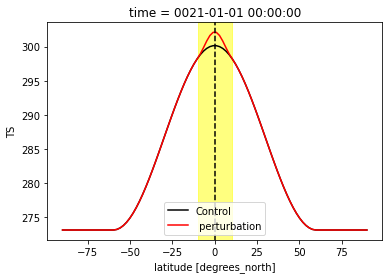

In [6]:
#surface_t2 = surface_t_2.mean('lon')
surface_t2 = data_control.TS.mean('lon')
surface_t2.plot(color="black",label="Control")
surface_t1 = data_00.TS.mean('lon')
surface_t1.plot(color="red",label=" perturbation")
#plot
plt.legend(loc='lower center')
plt.axvline(x=0,color="black",linestyle='dashed')
plt.axvspan(-10, 10, color='yellow', alpha=0.5)

## Other variables

Full list of CESM variables: https://www2.cesm.ucar.edu/models/cesm2/atmosphere/docs/ug6/hist_flds_f2000.html 

In [6]:
# The net longwave flux at the top of the model

data_00.FLNT

<xarray.DataArray 'FLNT' (time: 1, lat: 96, lon: 144)>
array([[[195.13887, 195.13979, ..., 195.1388 , 195.13907],
        [193.65504, 193.08711, ..., 194.31952, 193.94109],
        ...,
        [196.7363 , 196.14072, ..., 196.9263 , 197.13918],
        [195.31691, 195.3155 , ..., 195.33676, 195.3262 ]]], dtype=float32)
Coordinates:
  * time     (time) object 0021-01-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Net longwave flux at top of model
    cell_methods:       time: mean

In [7]:
# Net longwave flux at the surface

data_00.FLNS

<xarray.DataArray 'FLNS' (time: 1, lat: 96, lon: 144)>
array([[[79.3983  , 79.40211 , ..., 79.39641 , 79.39886 ],
        [80.2299  , 79.92358 , ..., 80.08627 , 80.222595],
        ...,
        [79.46216 , 78.62718 , ..., 80.00724 , 79.98925 ],
        [77.15022 , 77.14897 , ..., 77.19055 , 77.16949 ]]], dtype=float32)
Coordinates:
  * time     (time) object 0021-01-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Net longwave flux at surface
    cell_methods:       time: mean

In [8]:
# Net solar flux at the top of the model

data_00.FSNT

<xarray.DataArray 'FSNT' (time: 1, lat: 96, lon: 144)>
array([[[0.630925, 0.630922, ..., 0.630927, 0.630926],
        [8.233937, 8.205184, ..., 8.307201, 8.300164],
        ...,
        [8.369527, 8.322571, ..., 8.261292, 8.320506],
        [0.63259 , 0.632591, ..., 0.632564, 0.632591]]], dtype=float32)
Coordinates:
  * time     (time) object 0021-01-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    Sampling_Sequence:  rad_lwsw
    units:              W/m2
    long_name:          Net solar flux at top of model
    cell_methods:       time: mean